<a href="https://colab.research.google.com/github/azkaarahiilaa/Desain_dan_Analisis_Algoritma/blob/main/pertemuan6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# first two terms
n1, n2 = 0, 1
count = 0
nterms = int (input('how many terms?'))
if nterms <= 0:
    print("please enter a positive integer")
elif nterms == 1:
    print("fibonacci sequence upto",nterms,":")
    print(n1)
else:
    print("fibonacci sequence : ")
    while count < nterms:
      print(n1)
      nth = n1 + n2
      # update nilai
      n1 = n2
      n2 = nth
      count += 1



how many terms?3
fibonacci sequence : 
0
1
1


In [2]:
#fibonacci dengan rekursi
def recur_fibo(n):
   if n <= 1:
       return n
   else:
       return(recur_fibo(n-1) + recur_fibo(n-2))

nterms = 20

if nterms <=- 0:
   print("please enter a positive integer")
else:
  print("fibonacci sequence: ")
  for i in range (nterms):
      print(recur_fibo(i))

fibonacci sequence: 
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


bagaimana hasil fibonacci: 30 angka, rekursi, bisa input

In [3]:
#fibonacci dengan rekursi
def recur_fibo(n):
   if n <= 1:
       return n
   else:
       return(recur_fibo(n-1) + recur_fibo(n-2))

nterms = 30

if nterms <=- 0:
   print("please enter a positive integer")
else:
  print("fibonacci sequence: ")
  for i in range (nterms):
      print(recur_fibo(i))

fibonacci sequence: 
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

In [5]:
 #etry all tours (exact_TSP)
def exact_TSP(cities):
    "generate all posible tours of the cities and choose the shortest one"
    return shortest (alltours(cities))

def shortest(tours):
    "return the tour with the minimum total distance"
    return min(tours, key=total_distance)

In [6]:
#representing tours
alltours = itertools.permutations
cities = {1, 2, 3}
list(alltours(cities))


[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [7]:
# representing cities and distance
def total_distance(tour):
    "the total distance between each pair of consecutive cities and tour"
    return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

In [8]:
city = complex  #constructor for new cities, e.g. city(300,400)
def distance(A, B):
    "the distance between two points"
    return abs(A - B)

In [9]:
A = city(300,0)
B = city(0,400)
distance(A,B)

500.0

In [10]:
def Cities(n):
    "make a set of n cities, each with random coordinates"
    return set(city(random.randrange(10, 890), random.randrange(10, 590))  for c in range(n))

random.seed('seed')
cities8, cities10, cities100, cities1000 = Cities(8), Cities(10), Cities(100), Cities(1000)
cities8

{(151+70j),
 (252+365j),
 (303+506j),
 (498+96j),
 (54+361j),
 (551+542j),
 (684+435j),
 (800+430j)}

In [11]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

((551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j))
1990.388372313552


In [12]:
# try all non-redundant tours
def alltours(cities):
    "return a list of tours, each a permutation of cities, but each one starting with the sat=mecity"
    start = first(cities)
    return [[start] + list(tour)
            for tour in itertools.permutations(cities - {start})]

def first(collection):
    "start iterating over collection, and return the first ekement"
    for x in collection: return x


In [14]:
alltours({1, 2, 3})


[[1, 2, 3], [1, 3, 2]]

In [13]:
alltours({1, 2, 3, 4})

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2]]

In [15]:
tour = exact_TSP (cities8)

print(tour)
print(total_distance(tour))

[(551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j)]
1990.388372313552


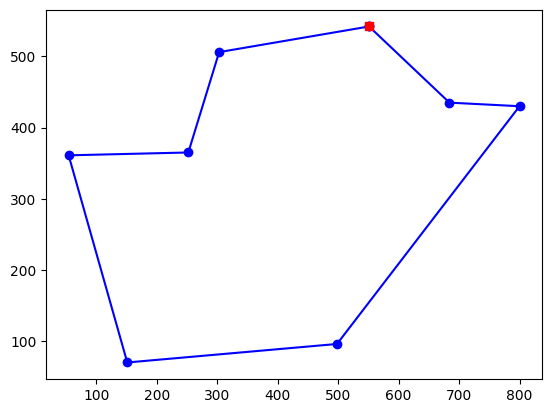

8 city tour; total distance = 1990.4; time = 0.022 secs for exact_TSP


In [16]:
#Plotting
import time
def plot_tour (algorithm, cities):
    "Apply a TSP algorithm to cities, and plot the resulting tour."
    # Find the solution and time how long it takes
    t0 = time.time()
    tour= algorithm(cities)
    t1 = time.time()
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline (list(tour) + [tour[0]])
    plotline([tour[0]], 'rs')
    plt.show()
    print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(
        len(tour), total_distance (tour), t1-t0, algorithm.__name__))

def plotline (points, style='bo-'):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    plt.plot(X, Y, style)

def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

plot_tour(exact_TSP, cities8)

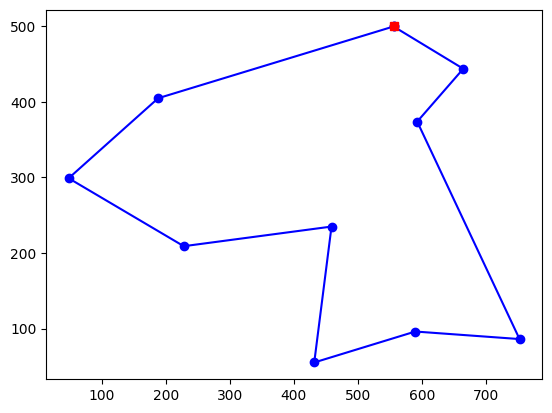

10 city tour; total distance = 2050.3; time = 1.707 secs for exact_TSP


In [17]:
plot_tour(exact_TSP, cities10)

In [18]:
def greedy_TSP(cities):
    "at each step, visit the nearaest neighbor that is still unvisited"
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def nearest_neighbor(A, cities):
    "find the city in cities that is nearest to city A"
    return min(cities, key=lambda x: distance(x, A))

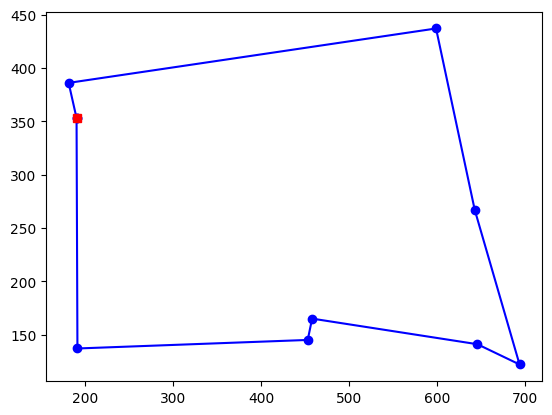

9 city tour; total distance = 1524.5; time = 0.158 secs for exact_TSP


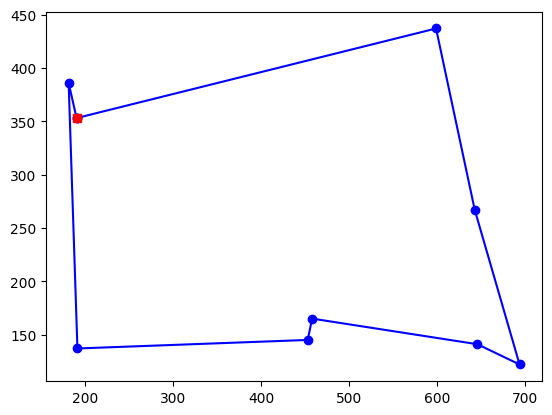

9 city tour; total distance = 1554.1; time = 0.000 secs for greedy_TSP


In [19]:
cities = Cities(9)
plot_tour(exact_TSP, cities)
plot_tour(greedy_TSP, cities)

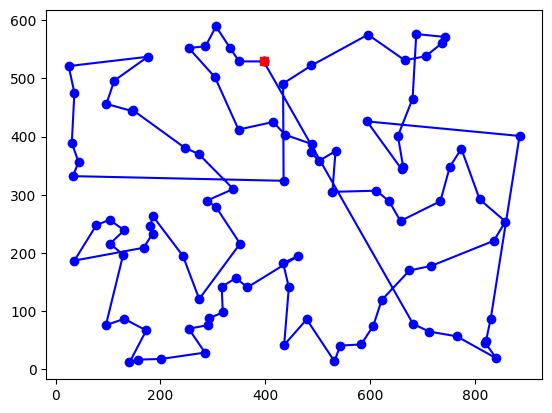

100 city tour; total distance = 6987.7; time = 0.002 secs for greedy_TSP


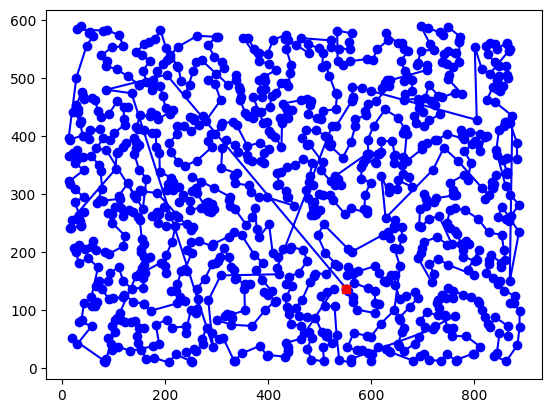

1000 city tour; total distance = 20529.4; time = 0.134 secs for greedy_TSP


In [20]:
plot_tour(greedy_TSP, cities100)
plot_tour(greedy_TSP, cities1000)

In [21]:
# greedy nearest neighbor(greedy_TSP)

def greedy_TSP (cities):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor (tour [-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))

In [22]:
#Algorithm 3: Greedy Nearest Neighbor from All Starting Points (all greedy_TSP)
def all_greedy_TSP (cities):
    "Try the greedy algorithm from each of the starting cities; return the shortest tour."
    return shortest (greedy_TSP (cities, start=c) for c in cities)
# We will modify greedy TSP to take an optional start city; otherwise it is unchanged.
def greedy_TSP (cities, start=None):
    "At each step, visit the nearest neighbor that is still unvisited."
    if start is None: start = first (cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor (tour [-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

In [23]:
#Algorithm 4: Greedy Nearest Neighbor with Exact End (greedy_exact_end_TSP)
def greedy_exact_end_TSP (cities, start=None, end_size=8):

    """At each step, visit the nearest neighbor that is still unvisited until
    there are k_end cities left; then choose the best of all possible endings."""
    if start is None: start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    # Use greedy algorithm for all but the last end_size cities while len(unvisited) > end_size:
    while len(unvisited) > end_size :
      C = nearest_neighbor(tour[-1], unvisited)
      tour.append(C)
      unvisited.remove(C)
    # Consider all permutations of possible ends to the tour, and choose the best one. # (But to make things faster, omit the middle of the tour.)
    ends = map(list, itertools.permutations (unvisited))
    best = shortest([tour[0], tour[-1]] + end for end in ends)
    return tour + best [2:]

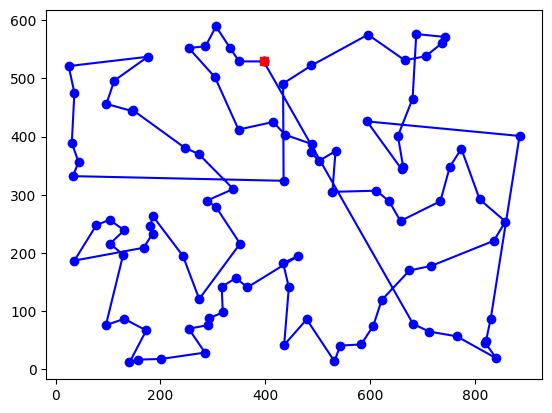

100 city tour; total distance = 6987.7; time = 0.168 secs for greedy_exact_end_TSP


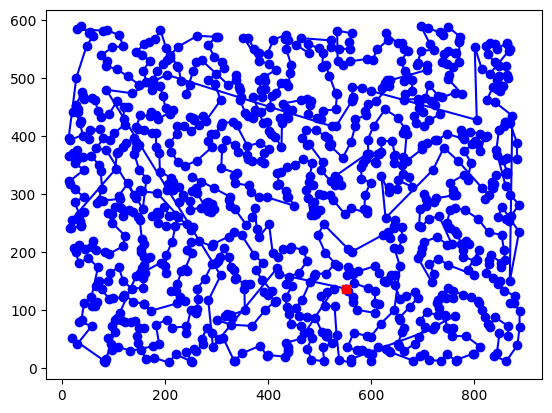

1000 city tour; total distance = 20171.0; time = 0.294 secs for greedy_exact_end_TSP


In [24]:
plot_tour (greedy_exact_end_TSP, cities100)
plot_tour (greedy_exact_end_TSP, cities1000)

In [26]:
def greedy_bi_TSP(cities, start_size=12, end_size=6):
    "At each step, visit the nearest neighbor that is still unvisited."
    starts = random.sample(cities, min (len(cities), start_size))
    return shortest (greedy_exact_end_TSP(cities, start, end_size)
                    for start in starts)

<ipython-input-26-9a8da55b0159>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min (len(cities), start_size))


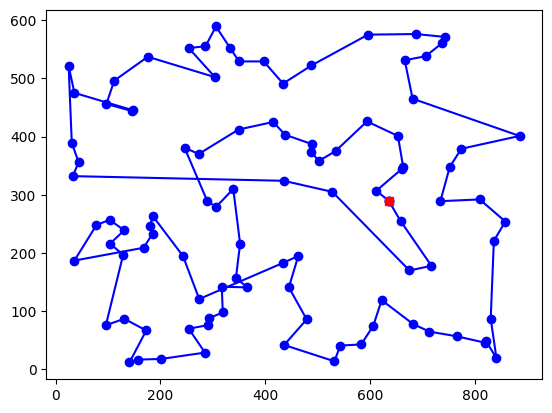

100 city tour; total distance = 6230.0; time = 0.061 secs for greedy_bi_TSP


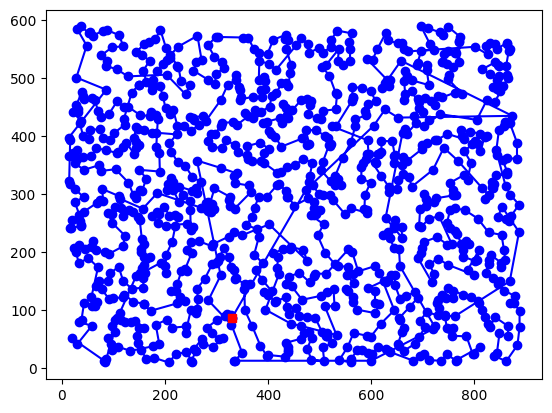

1000 city tour; total distance = 20070.7; time = 1.604 secs for greedy_bi_TSP


In [27]:
random.seed('bi')
plot_tour (greedy_bi_TSP, cities100)
plot_tour (greedy_bi_TSP, cities1000)

In [45]:
#Benchmarking Algorithms
def compare_algorithms (algorithms, maps):
    "Apply each algorithm to each map and plot results."
    for algorithm in algorithms:
      t0 = time.time()
      results = [total_distance (algorithm(m)) for m in maps]
      t1= time.time()
      avg = sum(results) / len(results)
      label = '{:.0f}; {:.1f}s: {}'.format(avg, t1-t0, algorithm.__name__)
      plt.plot(sorted (results), label=label)
    plt.legend (loc=2)
    plt.show()
    print('{} x {}-city maps'.format(len(maps), len(maps[0])))

def Maps (M, N):
    "Return a list of M maps, each consisting of a set of N cities."
    return [Cities (N) for m in range (M)]

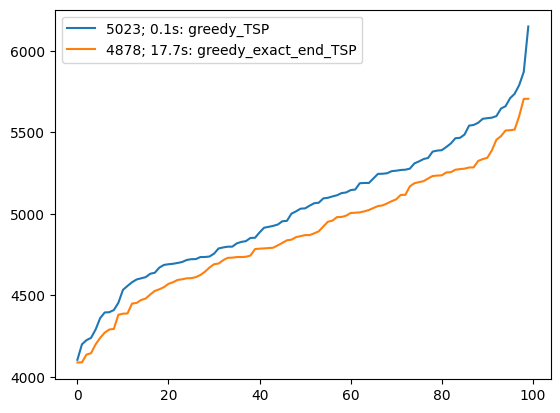

100 x 50-city maps


In [46]:
compare_algorithms ([greedy_TSP, greedy_exact_end_TSP], Maps(100, 50))

In [47]:
def bi_10_6(cities):  return greedy_bi_TSP(cities,  10, 6)
def bi_20_5(cities):  return greedy_bi_TSP(cities,  20, 5)
def bi_40_4(cities):  return greedy_bi_TSP(cities,  40, 4)
def bi_80_2(cities):  return greedy_bi_TSP(cities,  80, 2)
def bi_100_1(cities): return greedy_bi_TSP(cities, 160, 1)

algorithms = [bi_10_6, bi_20_5, bi_40_4, bi_80_2, bi_100_1]

<ipython-input-26-9a8da55b0159>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min (len(cities), start_size))


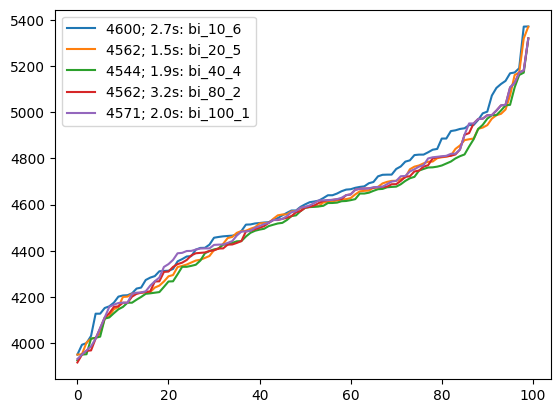

100 x 50-city maps


In [48]:
compare_algorithms(algorithms, Maps(100, 50))

<ipython-input-26-9a8da55b0159>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min (len(cities), start_size))


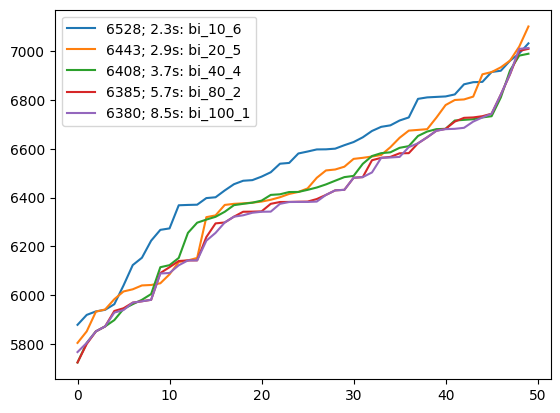

50 x 100-city maps


In [49]:
compare_algorithms (algorithms, Maps (50, 100))

<ipython-input-26-9a8da55b0159>:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  starts = random.sample(cities, min (len(cities), start_size))


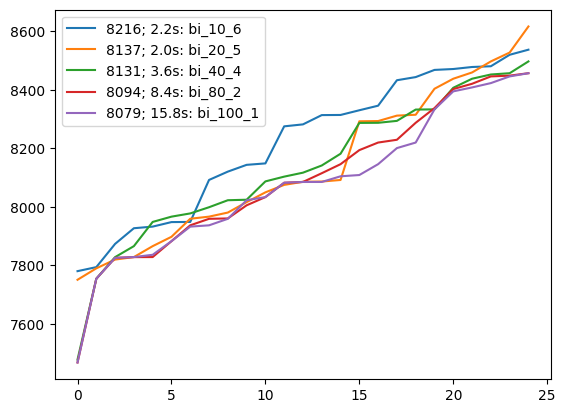

25 x 160-city maps


In [50]:
compare_algorithms (algorithms, Maps (25, 160))

In [51]:
string = 'BCAADDDCCACACAC'

# creating tree nodes
class NodeTree (object):
  def __init__(self, left=None, right = None):
    self.left = left
    self.right = right

  def children (self):
    return (self.left, self.right)

  def nodes (self):
    return ( self.left, self.right)

  def __str__(self):
    return '%s_%s' % (self.left, self.right)

In [52]:
# Main function implementing huffman coding

def huffman_code_tree (node, left = True, binstring = ''):
  if type (node) is str:
    return {node : binstring}
  (l, r) = node.children()
  d = dict()
  d.update (huffman_code_tree (l, True, binstring + '0'))
  d.update (huffman_code_tree (r, False, binstring +'1'))
  return d

In [53]:
# calculating frequency
freq = {}
for c in string:
  if c in freq:
    freq [c] = freq [c] + 1
  else :
    freq [c] = 1

freq = sorted (freq.items(), key = lambda x: x[1], reverse = True)
nodes = freq
while len(nodes) > 1:
  (key1, c1) = nodes [-1]
  (key2, c2) = nodes [-2]
  nodes = nodes [ : -2]
  node = NodeTree (key1, key2)
  nodes.append ((node, c1 + c2))

  nodes = sorted (nodes, key = lambda x: x[1], reverse = True)

huffmanCode = huffman_code_tree(nodes [0][0])

print ('Char | Huffman code ')
print ('-----------------------')
for (char, frequency) in freq:
  print (' %-4r |%12s ' % (char, huffmanCode [char]))

Char | Huffman code 
-----------------------
 'C'  |           0 
 'A'  |          11 
 'D'  |         101 
 'B'  |         100 


In [54]:
string = 'HUFFMAN'

print(' char | Huffman code ')
print('========================')
for (char, frequency) in freq:
  print(' %-4r |%12s' % (char, huffmanCode[char]))

 char | Huffman code 
 'C'  |           0
 'A'  |          11
 'D'  |         101
 'B'  |         100


In [77]:
# A Huffman Tree Node
import heapq

class node:
    def __init__(self, freq, symbol, left=None, right=None):
       # frequency of symbol
       self.freq = freq

       # symbol name (character)
       self.symbol = symbol

       # node left of current node
       self.left = left

       # node right of current node = node
       self.right = right

       # tree direction (0/1)
       self.huff = ''

    def __it__(self, nxt):
       return self.freq < nxt.freq


In [69]:
# utility function to print huffman
# codes for all symbols in the newly
# created huffman tree
def printNodes(node, val=''):

    # huffman code for a current node
    newVal = val + str(node.huff)

    # if node is not an edge node
    # then treverse inside it
    if(node.left):
        printNodes(node.left, newVal)
    if(node.right):
        printNodes(node.right, newVal)

        # if node is edge node then
        # display its huffman code
    if(not node.left and not node.right):
        print(f"{node.symbol} -> {newVal}")

In [80]:
import heapq

# Define a Huffman node class
class Node:
    def __init__(self, freq, char):
        self.freq = freq
        self.char = char
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.freq < other.freq

# Characters for Huffman tree
chars = ['a', 'b', 'c', 'd', 'e', 'f']

# Frequency of characters
freq = [5, 9, 12, 13, 16, 45]

# List containing nodes with characters and frequencies
nodes = []

# Converting characters and frequencies into Huffman tree nodes
for x in range(len(chars)):
    heapq.heappush(nodes, Node(freq[x], chars[x]))


In [81]:
while len(nodes) > 1:

    # sort all the nodes in ascending order
    # based on their frequency
    left = heapq.heappop(nodes)
    right = heapq.heappop(nodes)

    # assign directional value to these nodes
    left.huff = 0
    right.huff = 1